In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('/global/homes/f/fnafis/KrSTC/analysis/physrev.mpl')
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.fft import fft, ifft
from scipy import stats
import pickle

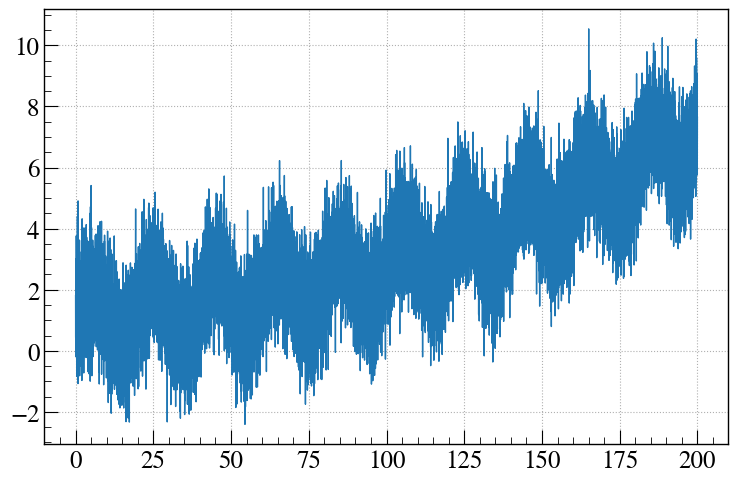

In [3]:
x = np.arange(0, 200, 0.01)
random_numbers_from_normal = np.random.normal(loc = 0, scale = 1, size = len(x))
sine = np.sin(2 * np.pi * 0.05 * x)
trend = np.exp(0.01 * x)
y = sine + random_numbers_from_normal + trend
plt.plot(x,sine+random_numbers_from_normal+trend, lw=1)

## Dickey-Fuller test of stationarity

In [4]:
import statsmodels.tsa.stattools as sts

In [5]:
sts.adfuller(trend+random_numbers_from_normal)

(-1.1064740625256295,
 0.7124832302466526,
 46,
 19953,
 {'1%': -3.4306777773505996,
  '5%': -2.86168486605018,
  '10%': -2.566847108243414},
 56839.77401790782)

# Seasonality, autocorrelation

/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


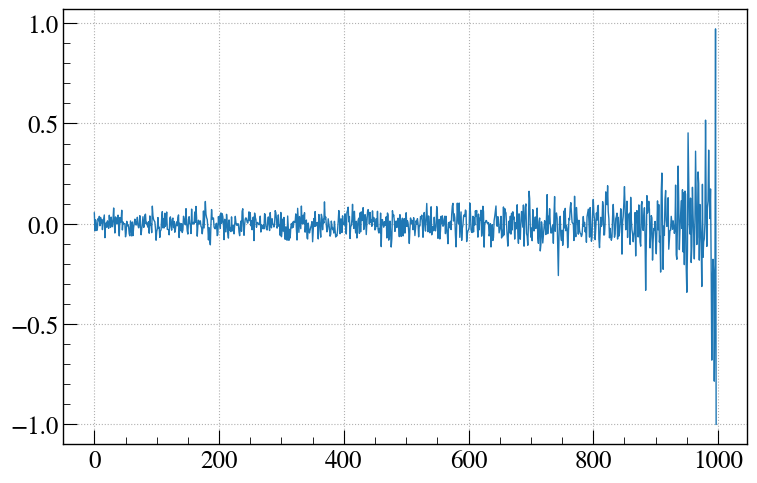

In [6]:
a = np.random.normal(size=1000)
corrcoefs = []
corrcoefs.append(np.corrcoef(a,a)[0,1])
for i in range(1, len(a)):
    corrcoefs.append(np.corrcoef(a[:-i], a[i:])[0,1])
plt.plot(corrcoefs[1:], lw=1)

10


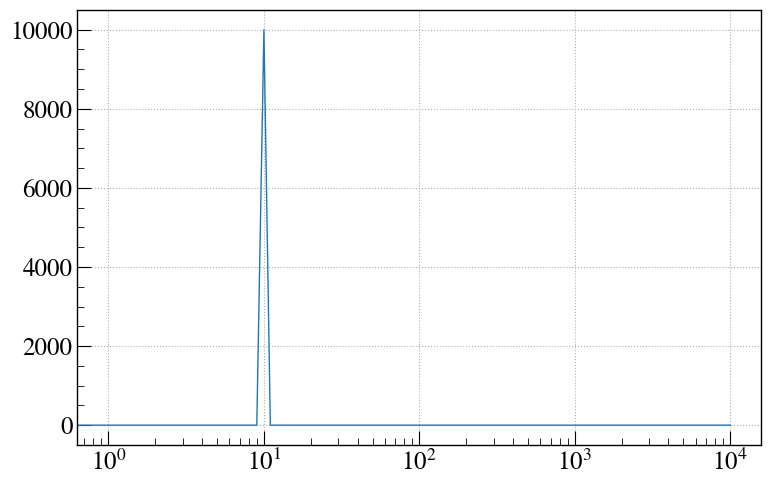

In [7]:
x = fft(sine)
x = np.abs(x[:len(x)//2])
print(np.argmax(x))
plt.plot(x, lw=1)
plt.xscale('log')

# LSTM

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

2024-05-19 21:15:54.194158: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-19 21:15:56.099400: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [9]:
train_dataset = y[:int(0.8*len(y))]
test_dataset = y[int(0.8*len(y)):]
def create_X_Y_for_LSTM(data, time_steps):
    X, Y = [], []
    for i in range(len(data)-time_steps):
        X.append(data[i:i+time_steps])
        Y.append(data[i+time_steps])
    return np.array(X), np.array(Y)
time_steps = 2
trainX, trainY = create_X_Y_for_LSTM(train_dataset, time_steps=time_steps)
testX, testY = create_X_Y_for_LSTM(test_dataset, time_steps=time_steps)
# trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
trainX

array([[1.804307  , 0.89568367],
       [0.89568367, 0.68119485],
       [0.68119485, 0.43932402],
       ...,
       [4.72810434, 3.33649208],
       [3.33649208, 4.10812246],
       [4.10812246, 3.83316589]])

In [11]:
model = Sequential()
model.add(LSTM(5, input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
pickle.dump(model, open('model_basic_lstm_5_2_1.pkl', 'wb'))

Epoch 1/100


2024-05-19 21:16:34.660415: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8900


15998/15998 - 50s - 3ms/step - loss: 1.5514
Epoch 2/100
15998/15998 - 23s - 1ms/step - loss: 1.3623
Epoch 3/100
15998/15998 - 23s - 1ms/step - loss: 1.3587
Epoch 4/100
15998/15998 - 23s - 1ms/step - loss: 1.3568
Epoch 5/100
15998/15998 - 23s - 1ms/step - loss: 1.3567
Epoch 6/100
15998/15998 - 23s - 1ms/step - loss: 1.3548
Epoch 7/100
15998/15998 - 22s - 1ms/step - loss: 1.3566
Epoch 8/100
15998/15998 - 23s - 1ms/step - loss: 1.3570
Epoch 9/100
15998/15998 - 22s - 1ms/step - loss: 1.3538
Epoch 10/100
15998/15998 - 23s - 1ms/step - loss: 1.3538
Epoch 11/100
15998/15998 - 23s - 1ms/step - loss: 1.3539
Epoch 12/100
15998/15998 - 22s - 1ms/step - loss: 1.3556
Epoch 13/100
15998/15998 - 22s - 1ms/step - loss: 1.3556
Epoch 14/100
15998/15998 - 22s - 1ms/step - loss: 1.3528
Epoch 15/100
15998/15998 - 23s - 1ms/step - loss: 1.3543
Epoch 16/100
15998/15998 - 23s - 1ms/step - loss: 1.3532
Epoch 17/100
15998/15998 - 22s - 1ms/step - loss: 1.3538
Epoch 18/100
15998/15998 - 23s - 1ms/step - loss: 1.